In [1]:
import matplotlib.image as mpimg 
import os 
  
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
# from keras.utils.np_utils import to_categorical 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.models import Sequential 
from keras import layers 
from tensorflow import keras 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling 
from sklearn.model_selection import train_test_split 
  
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from glob import glob 
import cv2 
  
import warnings 
warnings.filterwarnings('ignore') 

2024-10-01 16:36:05.398172: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 16:36:06.335285: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 16:36:06.340566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 16:36:08.094327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset='/home/hitech/novus/incabin/Traffic Signal Recognition/traffic_Data/DATA'
labelfile=pd.read_csv('labels.csv')

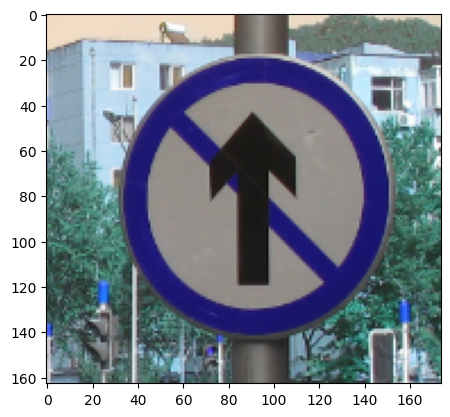

In [3]:
img=cv2.imread('traffic_Data/DATA/10/010_0003.png')
plt.imshow(img)

In [4]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [5]:
labelfile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [6]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,subset='training',
                                                            image_size=(224,224),seed=123,batch_size=32)

val_ds=tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,subset='validation',
                                                          image_size=(224,224),seed=123,batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


2024-10-01 16:36:13.803706: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [7]:
class_numbers=train_ds.class_names
class_names=[]
for i in class_numbers:
    class_names.append(labelfile['Name'][int(i)])

Train input shape: (32, 224, 224, 3)
Train labels shape: (32,)


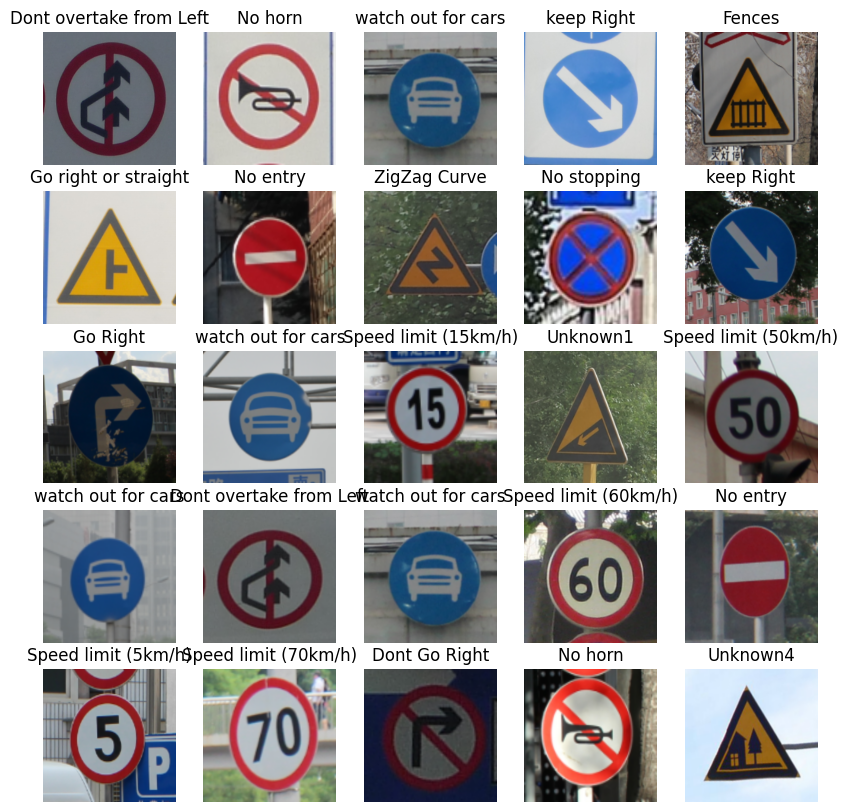

In [8]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    print("Train input shape:", images.shape)
    print("Train labels shape:", labels.shape)
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.show()

In [9]:
for inputs, labels in val_ds.take(1):
    print("Validation input shape:", inputs.shape)
    print("Validation labels shape:", labels.shape)

Validation input shape: (32, 224, 224, 3)
Validation labels shape: (32,)


In [10]:
data_augmentation = tf.keras.Sequential( 
    [ 
        tf.keras.layers.experimental.preprocessing.RandomFlip( 
            "horizontal", input_shape=(224, 224, 3)), 
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), 
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2), 
        tf.keras.layers.experimental.preprocessing.RandomFlip( 
            mode="horizontal_and_vertical") 
    ] 
) 

In [11]:
model=Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(len(labelfile),activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                 

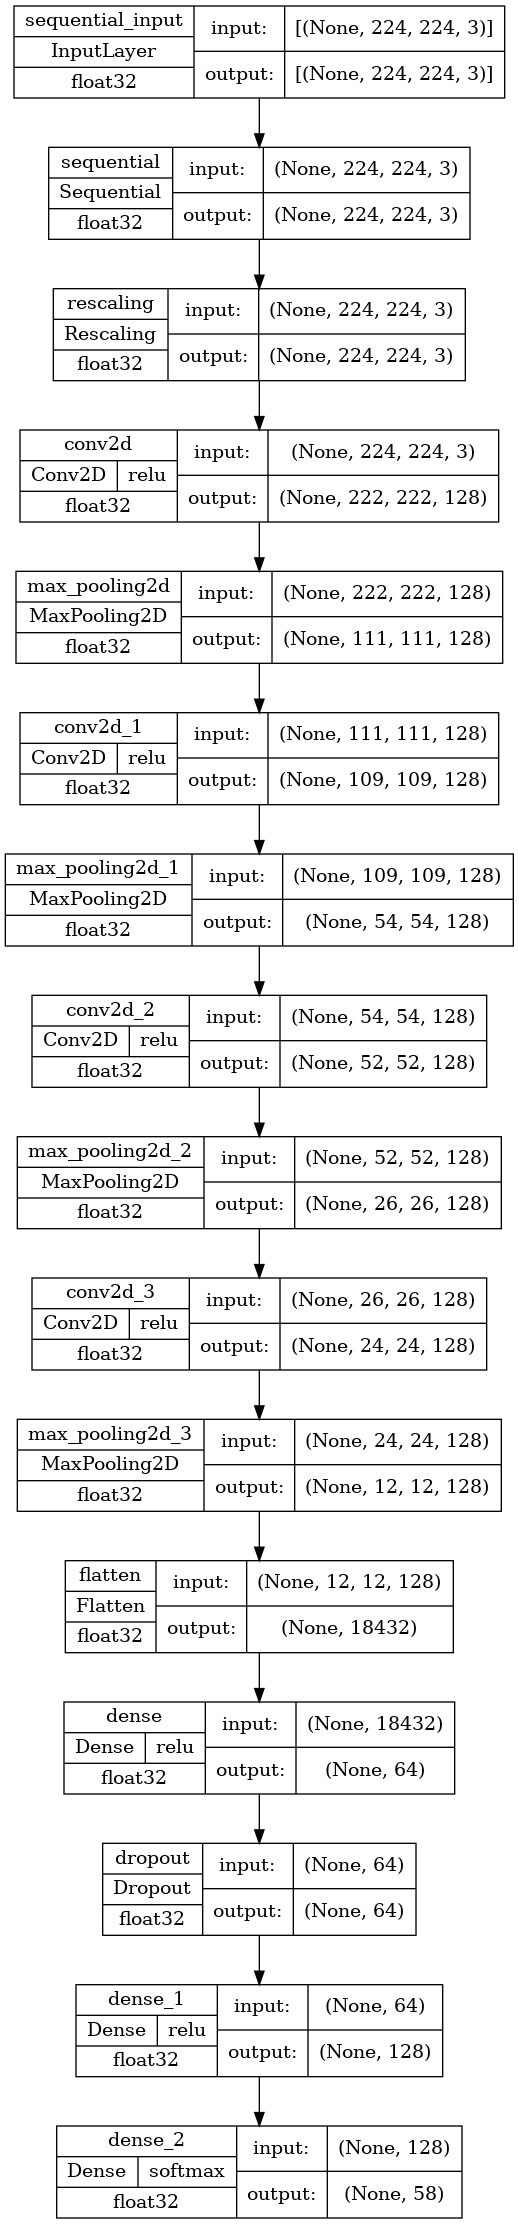

In [13]:
keras.utils.plot_model(
    model,show_shapes=True,show_dtype=True,show_layer_activations=True
)

In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
mycallbacks=[EarlyStopping(monitor='val_loss',patience=5)]

In [ ]:
history = model.fit(train_ds, 
                 validation_data=val_ds, 
                 epochs=50, 
                 callbacks=mycallbacks) 

Epoch 1/50
105/105 [==============================] - 475s 5s/step - loss: 0.9352 - accuracy: 0.6945 - val_loss: 0.6307 - val_accuracy: 0.8022
Epoch 2/50
105/105 [==============================] - 476s 5s/step - loss: 0.8800 - accuracy: 0.7104 - val_loss: 0.6097 - val_accuracy: 0.7926
Epoch 3/50
105/105 [==============================] - 480s 5s/step - loss: 0.8451 - accuracy: 0.7206 - val_loss: 0.5442 - val_accuracy: 0.8273
Epoch 4/50
 39/105 [==========>...................] - ETA: 4:44 - loss: 0.8372 - accuracy: 0.7244

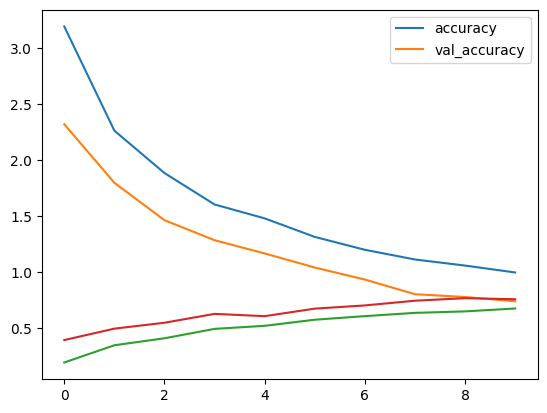

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

In [24]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Path to the image
img_path = '/home/hitech/novus/incabin/Traffic Signal Recognition/traffic_Data/TEST/015_1_0016.png'

# Load the image with the correct target size
img = image.load_img(img_path, target_size=(224, 224))  # Adjusted to 224x224

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the input shape of the model (1, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (if required, adjust based on your preprocessing)
# img_array = img_array / 255.0  # Assuming your model expects pixel values between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Output predictions
print(predictions)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {predicted_class}")
signal=class_names[int(predicted_class)]
print(signal)

1/1 [==============================] - 0s 61ms/step
[[4.12549287e-01 1.70498312e-01 2.01487355e-02 3.94054269e-03
  1.76798869e-02 3.47275077e-03 5.02948202e-02 3.70637216e-02
  1.49714556e-02 8.51367891e-04 7.44638499e-04 2.82333195e-02
  1.81193501e-02 1.74016852e-04 3.69167378e-06 1.63738558e-04
  7.21125662e-06 7.69281723e-06 1.92363800e-07 4.33646164e-05
  1.06246152e-05 1.11094805e-05 2.10042140e-06 2.17748284e-02
  6.35027027e-06 2.40175382e-07 3.07918745e-05 3.98021875e-05
  9.80395924e-08 3.65558139e-06 4.65125737e-07 1.34202355e-05
  7.84987642e-05 2.52597761e-06 8.09905902e-02 8.98863527e-06
  6.36179993e-06 2.20358245e-07 1.36607446e-06 6.25649193e-07
  2.30831290e-07 4.68009006e-07 1.14123295e-05 7.70641179e-07
  4.04809871e-05 3.75570469e-02 3.09375309e-06 2.18871428e-05
  3.20651656e-04 7.10188120e-04 3.60984473e-06 9.91855268e-06
  2.18133791e-03 4.66920286e-02 1.91150233e-02 7.51321297e-03
  1.63480162e-03 2.23297952e-03]]
Predicted Class: [0]
Speed limit (5km/h)
